<a href="https://colab.research.google.com/github/AfsaneHeydari/BigData-Spark/blob/main/municipality_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')
# !ls "/content/drive/My Drive/bigData/data/"
# !unrar x "/content/drive/My Drive/bigData/data/violationtraffic_csv.rar" "/content/drive/My Drive/bigData/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
CompanyID.csv  PlateAlphabet.csv  SystemID.csv	violationtraffic_csv.rar

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/bigData/data/violationtraffic_csv.rar


Would you like to replace the existing file /content/drive/My Drive/bigData/violationtraffic.csv
5269936234 bytes, modified on 2020-11-02 15:52
with a new one
5269936234 bytes, modified on 2020-11-02 15:52

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
!pip install -U pandas-profiling
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"


     |████████████████████████████████| 204.2MB 63kB/s 
     |████████████████████████████████| 204kB 50.1MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=fe3079573363a7dd77c49f57b937a5d6584eb2b73ee9c942cc280e504dfb8b69
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from pyspark.sql import SparkSession

spark = (SparkSession
 .builder
 .appName("AfsanehHeydariProject")
 .getOrCreate())

data = spark.read.csv("/content/drive/My Drive/bigData/violationtraffic.csv", header=True)

In [ ]:
data.show(20)

+--------------------+---------+-----------------+--------+--------+----------+---------+--------+
|        PassDatetime|CompanyId|MasterPlateNumber|DeviceId|SystemId|ImageScore|CrimeCode|CarSpeed|
+--------------------+---------+-----------------+--------+--------+----------+---------+--------+
|2020-04-23 18:23:...|      312|        362928811|   13182|     286|         0|      100|       0|
|2020-04-23 18:25:...|      312|        992721872|   13182|     286|         0|      100|       0|
|2020-04-23 18:28:...|      312|        521013866|   13182|     286|         0|      100|       0|
|2020-04-23 18:28:...|      312|        223287133|   13182|     286|         0|      100|       0|
|2020-04-23 18:30:...|      312|        332418610|   13182|     286|         0|      100|       0|
|2020-04-23 18:34:...|      312|        980255277|   13182|     286|         0|      100|       0|
|2020-04-23 18:42:...|      312|        290624317|   13182|     286|         0|      100|       0|
|2020-04-2

In [ ]:
data.printSchema()

root
 |-- PassDatetime: string (nullable = true)
 |-- CompanyId: string (nullable = true)
 |-- MasterPlateNumber: string (nullable = true)
 |-- DeviceId: string (nullable = true)
 |-- SystemId: string (nullable = true)
 |-- ImageScore: string (nullable = true)
 |-- CrimeCode: string (nullable = true)
 |-- CarSpeed: string (nullable = true)



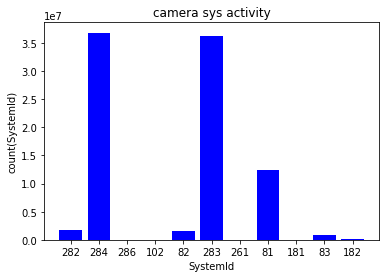

In [ ]:
import matplotlib.pyplot as plt

df = data.select("SystemId").groupBy("SystemId").agg(count("SystemId")).toPandas()
x = df['SystemId'].to_list()
y = df['count(SystemId)'].to_list()
plt.bar(x, y, color='b')
plt.xlabel("SystemId")
plt.ylabel("count(SystemId)")
plt.title("camera sys activity")
plt.show()

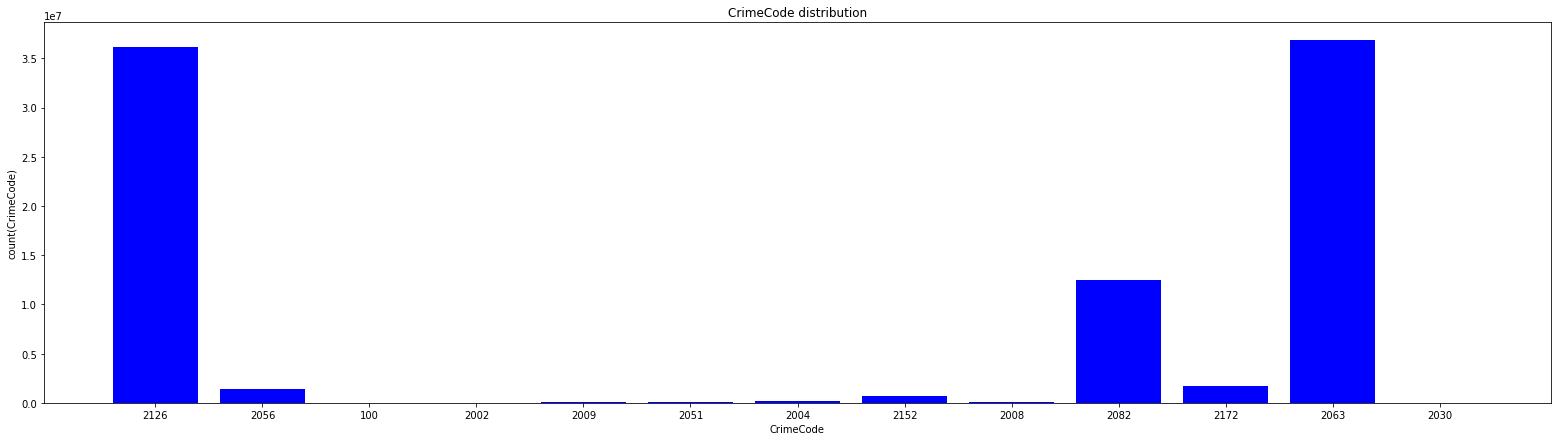

In [ ]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

df2 = data.select("CrimeCode").groupBy("CrimeCode").agg(count("CrimeCode")).toPandas()
x = df2['CrimeCode'].to_list()
y = df2['count(CrimeCode)'].to_list()

fig = plt.figure(figsize=(60 * 0.45, 7))
ax = fig.add_subplot(111)

ax.bar(x, y, color='b')
ax.set_xlabel("CrimeCode")
ax.set_ylabel("count(CrimeCode)")
ax.set_title("CrimeCode distribution")
# ax.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
fig.show()

In [ ]:
from pyspark.sql.functions import col, count
data.select("DeviceId","MasterPlateNumber").groupBy("MasterPlateNumber").agg(count("DeviceId")).sort(col("count(DeviceId)").desc()).show()

+-----------------+---------------+
|MasterPlateNumber|count(DeviceId)|
+-----------------+---------------+
|        110411111|           5116|
|        111911111|           2754|
|        223085782|           2532|
|        110111111|           2309|
|        280249992|           1669|
|        740416222|           1539|
|        363165944|           1530|
|        820464433|           1233|
|        221033133|           1233|
|        932424691|           1233|
|        552486629|           1202|
|        282744710|           1193|
|        152794420|           1188|
|        460435622|           1161|
|        662977410|           1104|
|        640413222|           1100|
|        670478522|           1090|
|        531586688|           1074|
|        252778410|           1071|
|        452833422|           1054|
+-----------------+---------------+
only showing top 20 rows



above counts display number of times a vihicle is cought by a camera. I was thinking abought TF_IDF solution for feature extraction from these bag of camera_ids or eqivalently, locations which a particular car was present at.

In [ ]:
from pyspark.sql.functions import col, countDistinct
data.agg(countDistinct(col("DeviceId")).alias("count")).show()

+-----+
|count|
+-----+
| 1259|
+-----+



the above count shows number of unique cameras present in data


In [ ]:
data.count()

89711774

In [ ]:
from pyspark.sql.functions import col
data.select("SystemId") \
  .where(col("SystemId") \
  .isNull()) \
  .count()

0

In [ ]:
from pyspark.sql.functions import col
data.select("CrimeCode") \
  .where(col("CrimeCode") \
  .isNull()) \
  .count()

0

In [ ]:
from pyspark.sql.functions import col
data.select("PassDatetime") \
  .where(col("PassDatetime") \
  .isNull()) \
  .count()

0

In [ ]:
from pyspark.sql.functions import lit, when, col
from pyspark.sql.functions import udf, array
from pyspark.sql.types import *

determine_items_udf = udf(lambda arr: [arr[0].split(' ')[1].split(':')[0], arr[1], arr[2]], ArrayType(StringType()))

df_freq = data.withColumn('items', determine_items_udf(array("PassDatetime", "DeviceId", "CrimeCode")) )
df_freq.show()

+--------------------+---------+-----------------+--------+--------+----------+---------+--------+----------------+
|        PassDatetime|CompanyId|MasterPlateNumber|DeviceId|SystemId|ImageScore|CrimeCode|CarSpeed|           items|
+--------------------+---------+-----------------+--------+--------+----------+---------+--------+----------------+
|2020-04-23 18:23:...|      312|        362928811|   13182|     286|         0|      100|       0|[18, 13182, 100]|
|2020-04-23 18:25:...|      312|        992721872|   13182|     286|         0|      100|       0|[18, 13182, 100]|
|2020-04-23 18:28:...|      312|        521013866|   13182|     286|         0|      100|       0|[18, 13182, 100]|
|2020-04-23 18:28:...|      312|        223287133|   13182|     286|         0|      100|       0|[18, 13182, 100]|
|2020-04-23 18:30:...|      312|        332418610|   13182|     286|         0|      100|       0|[18, 13182, 100]|
|2020-04-23 18:34:...|      312|        980255277|   13182|     286|    

In [ ]:
rules = model.associationRules
rules.filter(col("confidence")!=1).sort(col("lift").desc()).show(150)

+----------+----------+-------------------+------------------+
|antecedent|consequent|         confidence|              lift|
+----------+----------+-------------------+------------------+
|      [06]|    [2063]| 0.9452986179319067| 2.303387736837845|
|      [21]|    [2063]| 0.9338300858332493|2.2754426243681243|
|      [22]|    [2063]| 0.9253349678819965|  2.25474276282097|
|      [23]|    [2063]| 0.9150264297729709|2.2296241814387154|
|      [19]|    [2063]|  0.905891826410954|2.2073661002717513|
|      [00]|    [2063]| 0.9058641358548507| 2.207298627320723|
|      [18]|    [2063]| 0.9031633924473566|2.2007177870157015|
|      [17]|    [2063]|  0.897833376054146|2.1877302567640173|
|      [20]|    [2063]| 0.8959690185635779| 2.183187419083527|
|      [09]|    [2126]| 0.5504923813808491|1.3646216540345986|
|      [10]|    [2126]| 0.5433792264172638|1.3469887755059913|
|      [11]|    [2126]| 0.5370706733903725| 1.331350433619175|
|      [07]|    [2063]| 0.5460708558973768|1.3305984892

In [ ]:
from pyspark.ml.fpm import FPGrowth

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.01, minConfidence=0.2)
model = fpGrowth.fit(df_freq.select("items"))

# Display frequent itemsets.
model.freqItemsets.show()
# Display generated association rules.
model.associationRules.show(40)

+-------------+--------+
|        items|    freq|
+-------------+--------+
|      [12886]|  947003|
|[12886, 2126]|  947003|
|       [2063]|36817256|
|      [13655]|  919551|
|[13655, 2063]|  919551|
|       [2126]|36189993|
|       [2082]|12460841|
|      [13671]|  911414|
|[13671, 2063]|  911414|
|         [11]| 8727330|
|   [11, 2082]| 1621602|
|   [11, 2126]| 4687193|
|   [11, 2063]| 2151940|
|         [10]| 8619091|
|   [10, 2082]| 1634525|
|   [10, 2126]| 4683435|
|   [10, 2063]| 2053379|
|         [12]| 8513036|
|   [12, 2082]| 1576837|
|   [12, 2126]| 4564200|
+-------------+--------+
only showing top 20 rows

+----------+----------+-------------------+------------------+
|antecedent|consequent|         confidence|              lift|
+----------+----------+-------------------+------------------+
|    [2172]|   [12607]|                1.0| 52.04263687534553|
|   [12611]|    [2063]|                1.0|2.4366773558572645|
|    [1529]|    [2126]|                1.0|2.47891106251388

In [ ]:
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.functions import desc, col

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.01, minConfidence=0.2)
model = fpGrowth.fit(df_freq.select("items"))

# Display frequent itemsets.
model.freqItemsets.show()
# Display generated association rules.
model.associationRules.sort(col('lift').desc()).show()

+-------------+--------+
|        items|    freq|
+-------------+--------+
|      [12886]|  947003|
|[12886, 2126]|  947003|
|       [2063]|36817256|
|      [13655]|  919551|
|[13655, 2063]|  919551|
|       [2126]|36189993|
|       [2082]|12460841|
|      [13671]|  911414|
|[13671, 2063]|  911414|
|         [11]| 8727330|
|   [11, 2082]| 1621602|
|   [11, 2126]| 4687193|
|   [11, 2063]| 2151940|
|         [10]| 8619091|
|   [10, 2082]| 1634525|
|   [10, 2126]| 4683435|
|   [10, 2063]| 2053379|
|         [12]| 8513036|
|   [12, 2082]| 1576837|
|   [12, 2126]| 4564200|
+-------------+--------+
only showing top 20 rows

+----------+----------+------------------+------------------+
|antecedent|consequent|        confidence|              lift|
+----------+----------+------------------+------------------+
|    [2172]|   [12607]|               1.0| 52.04263687534553|
|   [12611]|    [2063]|               1.0|2.4366773558572645|
|    [1529]|    [2126]|               1.0|2.4789110625138835|
| 

In [ ]:
from pyspark.ml.fpm import FPGrowth

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.05, minConfidence=0.2)
model = fpGrowth.fit(df_freq.select("items"))

# Display frequent itemsets.
model.freqItemsets.show()
# Display generated association rules.
model.associationRules.show()

+----------+--------+
|     items|    freq|
+----------+--------+
|    [2063]|36817256|
|    [2126]|36189993|
|    [2082]|12460841|
|      [11]| 8727330|
|[11, 2126]| 4687193|
|      [10]| 8619091|
|[10, 2126]| 4683435|
|      [12]| 8513036|
|[12, 2126]| 4564200|
|      [09]| 8362014|
|[09, 2126]| 4603225|
|      [13]| 7363008|
|      [14]| 7201558|
|      [08]| 6991393|
|      [15]| 6771075|
|      [16]| 5147105|
+----------+--------+

+----------+----------+------------------+------------------+
|antecedent|consequent|        confidence|              lift|
+----------+----------+------------------+------------------+
|      [10]|    [2126]|0.5433792264172638|1.3469887755059913|
|      [09]|    [2126]|0.5504923813808491|1.3646216540345986|
|      [12]|    [2126]|0.5361424525868327|1.3290494568008246|
|      [11]|    [2126]|0.5370706733903725| 1.331350433619175|
+----------+----------+------------------+------------------+



In [ ]:
from pyspark.sql.functions import collect_set
df2 = data.select('MasterPlateNumber', 'DeviceId').groupBy("MasterPlateNumber").agg(collect_set("DeviceId"))
df2.show()

+-----------------+---------------------+
|MasterPlateNumber|collect_set(DeviceId)|
+-----------------+---------------------+
|         10887582|              [13882]|
|        110111844|              [12914]|
|        110113118|               [1699]|
|        110114789|       [12774, 12914]|
|        110118310|              [12764]|
|        110118558|               [1703]|
|        110121112|  [1734, 4499, 12620]|
|        110121316|              [12776]|
|        110121614|              [12607]|
|        110125537|               [1947]|
|        110128818|               [1655]|
|        110131951|               [1671]|
|        110139131|        [4509, 13548]|
|        110142238|               [1671]|
|        110142738|               [1935]|
|        110148537|               [1937]|
|        110148733| [1938, 1731, 1950...|
|        110151141|               [1938]|
|        110151168| [12612, 12782, 1944]|
|        110152922|               [1969]|
+-----------------+---------------

In [ ]:
from pyspark.ml.feature import CountVectorizer
DeviceIdVectorizer = CountVectorizer(inputCol="collect_set(DeviceId)", outputCol="DeviceId_OneHotEncoded", vocabSize=1259, minDF=1.0)
DeviceIdVectorizer_model = DeviceIdVectorizer.fit(df2)
df_ohe = DeviceIdVectorizer_model.transform(df2)
df_ohe.show()

+-----------------+---------------------+----------------------+
|MasterPlateNumber|collect_set(DeviceId)|DeviceId_OneHotEncoded|
+-----------------+---------------------+----------------------+
|         10887582|              [13882]|    (1259,[517],[1.0])|
|        110111844|              [12914]|     (1259,[33],[1.0])|
|        110113118|               [1699]|    (1259,[266],[1.0])|
|        110114789|       [12774, 12914]|  (1259,[33,320],[1...|
|        110118310|              [12764]|    (1259,[309],[1.0])|
|        110118558|               [1703]|    (1259,[158],[1.0])|
|        110121112|  [1734, 4499, 12620]|  (1259,[147,220,27...|
|        110121316|              [12776]|    (1259,[272],[1.0])|
|        110121614|              [12607]|      (1259,[4],[1.0])|
|        110125537|               [1947]|     (1259,[34],[1.0])|
|        110128818|               [1655]|    (1259,[183],[1.0])|
|        110131951|               [1671]|     (1259,[23],[1.0])|
|        110139131|      

In [ ]:
from pyspark.ml.feature import MinHashLSH

mh = MinHashLSH(inputCol="DeviceId_OneHotEncoded", outputCol="hashes", numHashTables=2)
model = mh.fit(df_ohe)
df_hash = model.transform(df_ohe)


In [ ]:
df_hash.show()

+-----------------+---------------------+----------------------+--------------------+
|MasterPlateNumber|collect_set(DeviceId)|DeviceId_OneHotEncoded|              hashes|
+-----------------+---------------------+----------------------+--------------------+
|         10887582|              [13882]|    (1259,[517],[1.0])|[[3.83989459E8], ...|
|        110111844|              [12914]|     (1259,[33],[1.0])|[[1.337845495E9],...|
|        110113118|               [1699]|    (1259,[266],[1.0])|[[1.164995549E9],...|
|        110114789|       [12774, 12914]|  (1259,[33,320],[1...|[[1.337845495E9],...|
|        110118310|              [12764]|    (1259,[309],[1.0])|[[8.4444184E8], [...|
|        110118558|               [1703]|    (1259,[158],[1.0])|[[7.37782927E8], ...|
|        110121112|  [1734, 4499, 12620]|  (1259,[147,220,27...|[[2.2679385E7], [...|
|        110121316|              [12776]|    (1259,[272],[1.0])|[[1.641635082E9],...|
|        110121614|              [12607]|      (1259,[

In [ ]:
df_hash.cache()

DataFrame[MasterPlateNumber: string, collect_set(DeviceId): array<string>, DeviceId_OneHotEncoded: vector, hashes: array<vector>]

In [ ]:
import pyspark.sql.functions as F
from pyspark.ml.feature import  VectorAssembler
from pyspark.sql.types import *
from pyspark.sql.functions import col

to_array = F.udf(lambda v: v.toArray().tolist()[0], FloatType())

df_kmeans = df_hash.withColumn('feature1', col("hashes")[0])
df_kmeans = df_kmeans.withColumn('feature1', to_array(col("feature1")))
df_kmeans = df_kmeans.withColumn('feature2', col("hashes")[1])
df_kmeans = df_kmeans.withColumn('feature2', to_array(col("feature2")))
# df_kmeans = df_kmeans.withColumn('feature3', col("hashes")[2])
# df_kmeans = df_kmeans.withColumn('feature3', to_array(col("feature3")))

vectorAssembler = VectorAssembler(inputCols = ["feature1", "feature2"], outputCol = "features")
df_kmeans = vectorAssembler.transform(df_kmeans)
df_kmeans = df_kmeans.select(['features', 'MasterPlateNumber'])

df_test = df_kmeans.sample(False, 5*10e-4, 123856)
df_test.show()
df_test.cache()

+--------------------+-----------------+
|            features|MasterPlateNumber|
+--------------------+-----------------+
|[2.48820448E8,5.5...|        110296210|
|[1.18605952E9,1.3...|         11884114|
|[3.510184E8,6.834...|        121753844|
|[4.26282816E8,1.4...|        121795921|
|[2.3027168E7,7.82...|        122198541|
|[3.23685792E8,1.1...|        122453599|
|[5.0359772E7,3.54...|        123014322|
|[5.5621248E8,1.52...|        131544311|
|[2.76153056E8,1.6...|        131731221|
|[3.9895024E8,1.65...|        132124644|
|[9.39267968E8,4.3...|        132914631|
|[2.28221232E8,1.8...|        133266177|
|[8.5223904E7,5393...|         13933179|
|[1.021265792E9,1....|        141794468|
|[3.16952416E8,1.4...|        142965416|
|[1.165061248E9,1....|        143076311|
|[1.1175836E8,7.58...|        150415435|
|[1.664180608E9,7....|        150494391|
|[2.21088768E8,6.2...|        153254153|
|[6.25142592E8,8.8...|        160221764|
+--------------------+-----------------+
only showing top

DataFrame[features: vector, MasterPlateNumber: string]

In [ ]:
from pyspark.ml.clustering import KMeans
k = 25
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model_km = kmeans.fit(df_test.select("MasterPlateNumber", "features"))
centers = model_km.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.05091536e+08 7.32842780e+07]
[1.78171487e+09 1.69685260e+09]
[1.70706032e+09 1.21595421e+09]
[2.35205374e+08 1.79263114e+09]
[1.87843787e+09 7.20420776e+08]
[4.07331870e+08 9.53323337e+08]
[1.33835273e+09 5.37572905e+08]
[65753251.03823894 71202839.25630425]
[1.63334825e+08 6.92799542e+08]
[1.45626665e+09 9.34538832e+08]
[1.81872716e+09 4.83404788e+07]
[9.10238038e+08 8.66406498e+07]
[7.96000878e+08 1.77616229e+09]
[5.93696001e+08 1.30602335e+09]
[1.23935233e+09 1.33041801e+08]
[3.53515520e+08 7.60475913e+07]
[1.58975308e+09 3.05335501e+08]
[1.02850544e+09 8.40504257e+08]
[8.49433465e+08 5.22550179e+08]
[1.16125038e+08 1.24301627e+09]
[1.07010603e+08 3.14793941e+08]
[4.28057393e+08 3.98265259e+08]
[1.34769020e+09 1.73273042e+09]
[6.68503372e+08 1.45893689e+08]
[1.10789476e+09 1.27502473e+09]


In [ ]:
df_test.unpersist()
clustered_df =  model_km.transform(df_kmeans.select("MasterPlateNumber", "features"))
clustered_df.show()

+-----------------+--------------------+----------+
|MasterPlateNumber|            features|prediction|
+-----------------+--------------------+----------+
|         10887582|[3.5854992E8,1.69...|         3|
|        110111844|[1.999304192E9,1....|         1|
|        110113118|[1.73556016E8,2.5...|        20|
|        110114789|[9.1558208E7,1.38...|        19|
|        110118310|[2.2148784E8,1.75...|         3|
|        110118558|[3.37551648E8,5.2...|        15|
|        110121112|[2.76153056E8,4.2...|        21|
|        110121316|[8.43803392E8,6.0...|        18|
|        110121614|[1.18491744E8,1.2...|        19|
|        110125537|[1.431653888E9,9....|         9|
|        110128818|[4.12816064E8,4.9...|        21|
|        110131951|[1.561583488E9,1....|         2|
|        110139131|[1.014532416E9,8....|        17|
|        110142238|[1.561583488E9,1....|         2|
|        110142738|[3.71617632E8,1.5...|        13|
|        110148537|[6.31476864E8,2.2...|        23|
|        110

In [ ]:
# float_centers = []

# for center in centers:
#   float_center = []

#   for c in center:
#     float_center.append(c.item())

#   float_centers.append(float_center)

# center_df = spark.createDataFrame(float_centers, ArrayType(FloatType())).withColumnRenamed("value", "center")
# center_df.show()
cluster_count_df = clustered_df.groupby('prediction').agg(F.count("MasterPlateNumber")).toPandas()
print(cluster_count_df)


    prediction  count(MasterPlateNumber)
0           12                    275401
1           22                    289055
2            1                    332186
3           13                    393924
4            6                    303255
5           16                    176999
6            3                    237846
7           20                    645515
8            5                    646014
9           19                    547046
10          15                    833329
11           9                    188712
12          17                    332564
13           4                    232617
14           8                    478150
15          23                    448760
16           7                    976911
17          10                    324468
18          24                    445777
19          21                    645662
20          11                    195329
21          14                    309573
22           2                    268096
23           0  

In [ ]:
ta = clustered_df.alias('ta')
tb = df_hash.alias('tb')
inner_join = ta.join(tb, ta.MasterPlateNumber == tb.MasterPlateNumber)
inner_join.show()
df_hash.unpersist()inner_join.cache()

+-----------------+--------------------+----------+-----------------+---------------------+----------------------+--------------------+
|MasterPlateNumber|            features|prediction|MasterPlateNumber|collect_set(DeviceId)|DeviceId_OneHotEncoded|              hashes|
+-----------------+--------------------+----------+-----------------+---------------------+----------------------+--------------------+
|         10887582|[3.5854992E8,1.69...|         3|         10887582|              [13882]|    (1259,[517],[1.0])|[[3.5854993E8], [...|
|        110111844|[1.999304192E9,1....|         1|        110111844|              [12914]|     (1259,[33],[1.0])|[[1.999304252E9],...|
|        110113118|[1.73556016E8,2.5...|        20|        110113118|               [1699]|    (1259,[266],[1.0])|[[1.73556021E8], ...|
|        110114789|[9.1558208E7,1.38...|        19|        110114789|       [12774, 12914]|  (1259,[33,320],[1...|[[9.1558212E7], [...|
|        110118310|[2.2148784E8,1.75...|        

DataFrame[MasterPlateNumber: string, features: vector, prediction: int, MasterPlateNumber: string, collect_set(DeviceId): array<string>, DeviceId_OneHotEncoded: vector, hashes: array<vector>]

In [ ]:
from pyspark.sql.functions import lit, when, col
from pyspark.sql.functions import udf, array
from pyspark.sql.types import *

df = inner_join.filter(inner_join.prediction == 0)
df = df.select("ta.MasterPlateNumber", "collect_set(DeviceId)", "DeviceId_OneHotEncoded", "hashes" )

model.approxSimilarityJoin(df, df,  0.6, distCol="EuclideanDistance")\
    .select(col("datasetA.MasterPlateNumber").alias("MasterPlateNumber_1"),
            col("datasetB.MasterPlateNumber").alias("MasterPlateNumber_2"),
            col("EuclideanDistance")).show(100)


+-------------------+-------------------+-----------------+
|MasterPlateNumber_1|MasterPlateNumber_2|EuclideanDistance|
+-------------------+-------------------+-----------------+
|          112887788|          170697666|              0.0|
|          112887788|          211778831|              0.0|
|          112887788|          461968177|              0.0|
|          112887788|          522847161|              0.0|
|          112887788|          552824235|              0.5|
|          112887788|          632921533|              0.0|
|          112887788|          813198620|              0.0|
|          112887788|          860226818|              0.0|
|          112887788|          912451433|              0.0|
|          112887788|          982479410|              0.0|
|          112887788|          993115281|              0.0|
|          130185114|          121725734|              0.5|
|          130185114|          152723338|              0.5|
|          130185114|          162844367

In [ ]:
df = inner_join.filter(inner_join.prediction == 1)
df = df.select("ta.MasterPlateNumber", "collect_set(DeviceId)", "DeviceId_OneHotEncoded", "hashes" )

model.approxSimilarityJoin(df, df,  0.6, distCol="EuclideanDistance")\
    .select(col("datasetA.MasterPlateNumber").alias("MasterPlateNumber_1"),
            col("datasetB.MasterPlateNumber").alias("MasterPlateNumber_2"),
            col("EuclideanDistance")).show(100)


+-------------------+-------------------+-----------------+
|MasterPlateNumber_1|MasterPlateNumber_2|EuclideanDistance|
+-------------------+-------------------+-----------------+
|          110245364|          271772710|              0.0|
|          110245364|          280644399|              0.0|
|          110245364|          321014247|              0.0|
|          110245364|          341023123|              0.0|
|          110245364|          512412955|              0.0|
|          110245364|          680425638|              0.0|
|          110245364|          713276412|              0.0|
|          110245364|          983263433|              0.0|
|          110355511|          110355511|              0.0|
|          110355511|          181984513|              0.0|
|          110355511|          351587866|              0.0|
|          110355511|          651725654|              0.0|
|          110355511|          692411730|              0.0|
|          111928957|          172772680

Page Rank:


In [ ]:
from pyspark.sql.functions import  lead, desc,col
from pyspark.sql.window import Window
from pyspark.sql.types import *

df = data.withColumn("PassDatetime",col("PassDatetime").cast(TimestampType()))
df = df.withColumn("lead_DeviceId", lead("DeviceId").over(
    Window.partitionBy('MasterPlateNumber').orderBy(desc('PassDatetime'))))
df = df.na.drop()
df.show()
df.cache()

+-------------------+---------+-----------------+--------+--------+----------+---------+--------+-------------+
|       PassDatetime|CompanyId|MasterPlateNumber|DeviceId|SystemId|ImageScore|CrimeCode|CarSpeed|lead_DeviceId|
+-------------------+---------+-----------------+--------+--------+----------+---------+--------+-------------+
|2020-06-08 00:20:09|      264|        110114789|   12774|     284|        84|     2063|       0|        12914|
|2020-05-02 10:31:25|      264|        110121112|    1734|     283|        84|     2126|       0|        12620|
|2020-05-01 17:37:08|      161|        110121112|   12620|     284|        84|     2063|       0|         4499|
|2020-06-15 12:01:10|      264|        110139131|    4509|     283|        84|     2126|       0|        13548|
|2020-06-20 10:33:23|      264|        110148733|    1708|     283|       100|     2126|       0|        12607|
|2020-06-20 08:23:10|      305|        110148733|   12607|     282|        77|     2172|      71|       

DataFrame[PassDatetime: timestamp, CompanyId: string, MasterPlateNumber: string, DeviceId: string, SystemId: string, ImageScore: string, CrimeCode: string, CarSpeed: string, lead_DeviceId: string]

In [ ]:
from pyspark.sql.functions import collect_set
from pyspark.sql.functions import lit

df2 = df.select('DeviceId', 'lead_DeviceId').groupBy("DeviceId").agg(collect_set("lead_DeviceId"))
df2 = df2.withColumn('Rank', lit(1))
df2.show()
df2.cache()

+--------+--------------------------+----+
|DeviceId|collect_set(lead_DeviceId)|Rank|
+--------+--------------------------+----+
|   13442|      [13663, 12612, 12...|   1|
|   13610|      [12861, 13614, 13...|   1|
|   13772|      [13706, 12612, 13...|   1|
|   13865|      [1713, 12612, 137...|   1|
|   12637|      [12612, 901, 1313...|   1|
|   12204|      [13706, 1877, 136...|   1|
|   12750|      [13636, 12612, 13...|   1|
|   13041|      [12612, 12767, 12...|   1|
|   13170|      [12861, 13679, 13...|   1|
|   13395|      [12861, 12612, 13...|   1|
|   13460|      [13706, 12861, 13...|   1|
|   13660|      [13614, 1574, 126...|   1|
|   13866|      [1713, 12612, 135...|   1|
|   12710|      [12861, 13614, 13...|   1|
|   13174|      [1877, 13614, 136...|   1|
|   13805|      [12861, 12612, 17...|   1|
|   13429|      [13663, 13614, 13...|   1|
|   13655|      [13614, 12639, 13...|   1|
|   13700|      [12612, 901, 1373...|   1|
|   13906|      [13706, 12612, 43...|   1|
+--------+-

DataFrame[DeviceId: string, collect_set(lead_DeviceId): array<string>, Rank: int]

In [ ]:
df.unpersist()
rdd = df2.rdd.map(tuple)
rdd.cache()
df2.unpersist()

DataFrame[DeviceId: string, collect_set(lead_DeviceId): array<string>, Rank: int]

In [ ]:
def func(routes, rank):
  pgr = []
  l = len(routes)
  for r in routes:
    pgr.append((r,rank/l))
  
  return pgr

In [ ]:
rdd2 = rdd.flatMap(lambda X: func(X[1], X[2]))
ranks = rdd2.reduceByKey(lambda x,y: x+y).mapValues(lambda rank: rank*0.85 + 0.15)
rdd_joined = rdd.join(ranks)
rdd = rdd_joined.map(lambda x:(x[0], x[1][0], x[1][1])) 
print(rdd.take(5))

[('966', ['1877', '12612', '1730', '962', '13576', '13132', '12914', '13624', '12890', '12849', '966', '13269', '4370', '13638', '503', '320', '12869', '12886', '13652', '969', '13256', '13490', '532', '12607', '1529', '12884', '13403', '4406', '13664', '4358', '13674', '13489', '13642', '13646', '12777', '1962', '13637', '13848', '13201', '13612', '13659', '13742', '842', '13677', '12606', '1708', '1452', '1668', '12605', '961', '13668', '1637', '4508', '1882', '13200', '13258', '12782', '13645', '13198', '4377', '13660', '12899', '1969', '12725', '12910', '12871', '1681', '13655', '13750', '13871', '834', '13885', '1947', '12624', '13100', '13197', '843', '12842', '12618', '13503', '963', '13754', '13390', '13640', '4407', '12843', '12903', '13506', '1970', '310', '12654', '4262', '13463', '967', '1945', '13662', '965', '12199', '1672', '968', '13630', '13440', '13266', '4645', '505', '1684', '1938', '13524', '1889', '1731', '13633', '13439', '327', '13666', '1671', '13486', '13039',

In [ ]:
page_rank_iter =  3
for i in range(page_rank_iter):
  rdd2 = rdd.flatMap(lambda X: func(X[1], X[2]))
  ranks = rdd2.reduceByKey(lambda x,y: x+y).mapValues(lambda rank: rank*0.85 + 0.15)
  rdd_joined = rdd.join(ranks)
  rdd = rdd_joined.map(lambda x:(x[0], x[1][0], x[1][1]))
  rdd.cache()
df = spark.createDataFrame(rdd)
df.show()

+-----+--------------------+-------------------+
|   _1|                  _2|                 _3|
+-----+--------------------+-------------------+
|  966|[1877, 12612, 173...|0.34553127580255966|
| 4335|[12612, 13739, 43...| 0.9507292401015844|
|13589|[1713, 12612, 194...| 0.5559424788024567|
| 1664|[13614, 12639, 13...| 2.0276553752078073|
|13548|[13614, 12639, 13...| 2.0040598713209676|
| 1674|[12612, 13614, 13...| 0.6071238921847965|
|13544|[12861, 12612, 18...| 0.7869819301401518|
| 1355|[13663, 13614, 13...|  1.249984522617361|
|13616|[12861, 12612, 13...| 0.8463455415360662|
|13685|[12612, 4320, 137...| 0.5714924431803857|
| 1694|[12612, 13739, 13...| 0.8456709461538757|
| 1631|[12861, 12612, 13...| 0.8554481001108908|
|12766|[13663, 13706, 13...| 1.9345771964083451|
|13049|[1713, 12612, 135...|0.37869392995964135|
|13738|[13706, 12612, 43...|  0.719832748446618|
|  337|[1877, 12612, 171...| 0.9684651013261135|
|12688|[12612, 13614, 29...| 0.6307629599464888|
| 1879|[13614, 1574,

In [ ]:
from pyspark.sql.functions import max

# m = df.agg({"_3": "max"}).collect()[0]
m  = 2.681113777335102
# df.withColumn("Page_Rank", lit(col('_3')/m))
df.sort(col("_3").desc()).withColumn("Page_Rank", lit(col('_3')/m)).show()

+-----+--------------------+------------------+------------------+
|   _1|                  _2|                _3|         Page_Rank|
+-----+--------------------+------------------+------------------+
|13624|[13614, 12639, 13...| 2.681113777335102|               1.0|
|13664|[13614, 12639, 13...|2.6236944728703415|0.9785837867269354|
|13631|[13614, 12639, 13...|  2.60887662542025|0.9730570360252848|
|13642|[13614, 1574, 126...| 2.558862684102581|0.9544028700810928|
|13630|[13614, 13248, 12...| 2.537962192913499|0.9466074190391544|
|12612|[13614, 12639, 13...|2.5067211702366077|0.9349551635694356|
|13668|[13614, 13248, 12...| 2.477646607416091|0.9241109528289966|
|12607|[13614, 1574, 126...|2.4642455216240733|0.9191126249306043|
|12611|[13614, 1574, 126...|2.4544191811173857|0.9154476031065568|
|13643|[13614, 12639, 13...|2.4528327085241535|0.9148558816336959|
|13663|[13614, 1574, 126...|2.4467659279101204|0.9125930979110062|
|12886|[13614, 12639, 13...|2.4424170534540126|0.9109710576630

In [ ]:
print(m)


Row(max(_3)=2.681113777335102)
